# Step 1: Import modules

In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

# Step 2: Read the data set

In [ ]:
too = pd.read_csv("Home_Market_Value.csv")
too.head()

,House Age,Square Feet,Market Value
0,33,"1,812","$90,000.00"
1,32,"1,914","$104,400.00"
2,32,"1,842","$93,300.00"
3,33,"1,812","$91,000.00"
4,32,"1,836","$101,900.00"


# Step 3: Rename (Optional)

In [ ]:
too['Square Feet'] = too['Square Feet'].replace('[,]', '', regex=True).astype(int)
too['Market Value'] = too['Market Value'].replace('[$,]', '', regex=True).astype(float)
sf=too['Square Feet']
mv=too['Market Value']
ha=too['House Age']

# Start doing the statistics

## Step 1: Calculate the median of each column of values in the dataset

> The second quartile point (Q2) is equivalent to the median value of the data set, located at $\frac{(n + 1)}{2}$. So it mean Q2 is also the median. Here we test the median of each column.

In [ ]:
st.median(ha)

28.0

In [ ]:
st.median(sf)

1666.0

In [ ]:
st.median(mv)

88900.0

## Step 2: Finding outliers of House Age column through IQR

In [ ]:
q1_ha = ha.quantile(0.25)
q2_ha = ha.quantile(0.5)
q3_ha = ha.quantile(0.75)
iqr_ha = q3_ha - q1_ha
lower_bound_ha = q1_ha - 1.5 * iqr_ha
upper_bound_ha = q3_ha + 1.5 * iqr_ha
#using boolean to choose column in dataframe "Too"
outliers_ha = too[(ha < lower_bound_ha) | (ha > upper_bound_ha)]
outliers_ha

,House Age,Square Feet,Market Value


In [ ]:
print(q1_ha)
print(q2_ha)
print(q3_ha)

27.75
28.0
32.0


## Step 3: Finding outliers of Square Feet column through IQR

In [ ]:
q1_sf = sf.quantile(0.25)
q2_sf = sf.quantile(0.5)
q3_sf = sf.quantile(0.75)
iqr_sf = q3_sf - q1_sf
lower_bound_sf = q1_sf - 1.5 * iqr_sf
upper_bound_sf = q3_sf + 1.5 * iqr_sf
#using boolean to choose column in dataframe "Too"
outliers_sf = too[(sf < lower_bound_sf) | (sf > upper_bound_sf)]
outliers_sf

,House Age,Square Feet,Market Value
13,32,2372,114000.0
14,32,2372,113200.0


In [ ]:
print(q1_sf)
print(q2_sf)
print(q3_sf)

1520.0
1666.0
1796.25


## Step 4: Finding outliers of Market Value column through IQR

In [ ]:
q1_mv = mv.quantile(0.25)
q2_mv = mv.quantile(0.5)
q3_mv = mv.quantile(0.75)
iqr_mv = q3_mv - q1_mv
lower_bound_mv = q1_mv - 1.5 * iqr_mv
upper_bound_mv = q3_mv + 1.5 * iqr_mv
#using boolean to choose column in dataframe "Too"
outliers_mv = too[(mv < lower_bound_mv) | (mv > upper_bound_mv)]
outliers_mv

,House Age,Square Feet,Market Value
13,32,2372,114000.0
14,32,2372,113200.0
16,32,2123,116100.0
41,27,1581,120700.0
43,27,1581,120700.0


In [ ]:
print(q1_mv)
print(q2_mv)
print(q3_mv)

86925.0
88900.0
96700.0


# Step 4: Visualizing the outliers through IQR

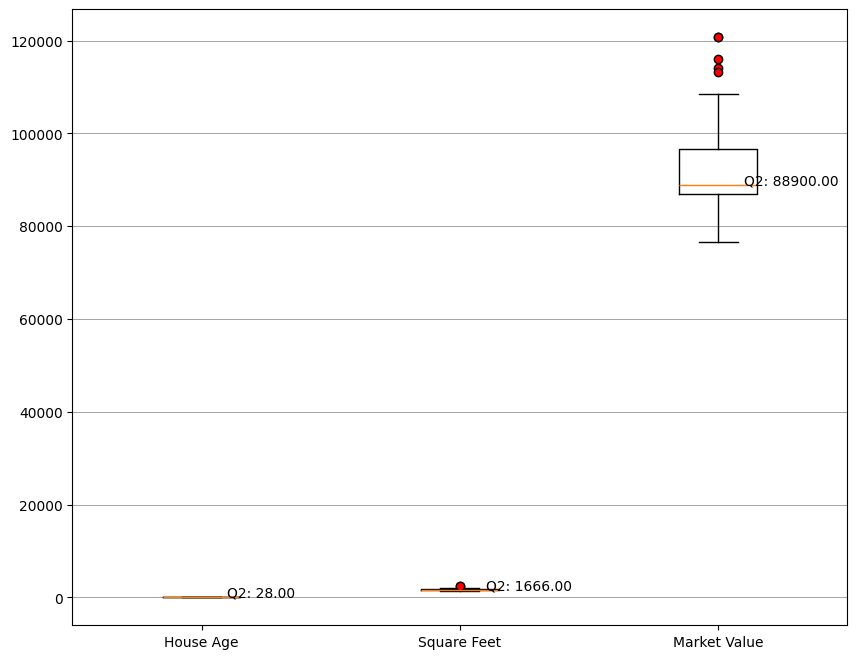

In [ ]:
# Setting colors for outliers
outlier_color = dict(markerfacecolor='red')

# Zoom the boxplot image
plt.figure(figsize=(10, 8))

# Draw boxplot with already set color above
plt.boxplot(too, flierprops=outlier_color,labels=['House Age', 'Square Feet', 'Market Value'])

# Adding grid
plt.grid(True, axis='y', color='grey', linestyle='-', linewidth=0.5)

# Adding text
"""plt.text(1.1, q1_ha, f'Q1: {q1_ha:.2f}')"""
plt.text(1.1, q2_ha, f'Q2: {q2_ha:.2f}')
"""plt.text(1.1, q3_ha, f'Q3: {q3_ha:.2f}')"""
"""plt.text(2.1, q1_sf, f'Q1: {q1_sf:.2f}')"""
plt.text(2.1, q2_sf, f'Q2: {q2_sf:.2f}')
"""plt.text(2.1, q3_sf, f'Q3: {q3_sf:.2f}')"""
"""plt.text(3.1, q1_mv, f'Q1: {q1_sf:.2f}')"""
plt.text(3.1, q2_mv, f'Q2: {q2_mv:.2f}')
"""plt.text(3.1, q3_mv, f'Q3: {q3_sf:.2f}')"""


# Adding text for outliers
"""for i, outlier in enumerate(outliers):
    #plt.text(i+1, outlier, f'Outlier: {outlier}')"""


plt.show()